# 3. Projektaufgabe

In [77]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/Library_Usage_Clean.csv')


## Wie setzt sich die Kundschaft mit null Ausleihen zusammen?

In [78]:
row_filter_null = (df['Total Checkouts'] == 0.0)
df_null = df.loc[row_filter_null]
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98462 entries, 0 to 395668
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    98462 non-null  int64  
 1   Patron Type Code              98462 non-null  int64  
 2   Patron Type Definition        98462 non-null  object 
 3   Total Checkouts               98462 non-null  int64  
 4   Total Renewals                98462 non-null  int64  
 5   Age Range                     98462 non-null  object 
 6   Home Library Code             98462 non-null  object 
 7   Home Library Definition       98462 non-null  object 
 8   Circulation Active Month      98462 non-null  object 
 9   Circulation Active Year       98462 non-null  float64
 10  Notice Preference Code        98462 non-null  object 
 11  Notice Preference Definition  98462 non-null  object 
 12  Provided Email Address        98462 non-null  bool   
 13  

## Wieviel Prozent der Kunden sind Senioren und Kinder/Jugendliche?

In [79]:
row_filter1 = (df['Age Range'] == '65 to 74 years') | (df['Age Range'] =='75 years and over')
senioren = len(df.loc[row_filter1])*100/len(df)

row_filter2 = (df['Age Range'] == '0 to 9 years') | (df['Age Range'] == '10 to 19 years')
kinder = len(df.loc[row_filter2])*100/len(df)


print(round(senioren,2),"Prozent der Kunden sind Senioren ab 65 Jahren,",round(kinder,2),"Prozent sind Kinder und Jugendliche bis 19 Jahre.")


12.27 Prozent der Kunden sind Senioren ab 65 Jahren, 20.15 Prozent sind Kinder und Jugendliche bis 19 Jahre.


<Figure size 640x480 with 0 Axes>

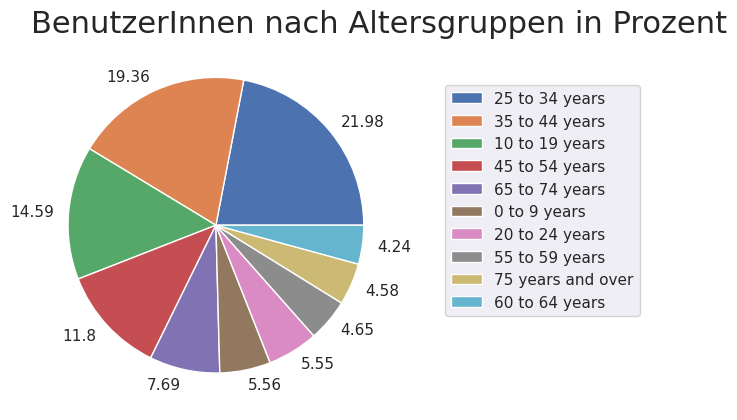

<Figure size 640x480 with 0 Axes>

In [80]:
alle = len(df)
df_alter = df['Age Range']
s = df_alter.value_counts()*100/alle
plt.pie(s,labels=(round(s,2)))
plt.legend(s.index,bbox_to_anchor=(1.1,0.9),loc='upper left')
plt.title('BenutzerInnen nach Altersgruppen in Prozent',fontsize=22,loc='left')
plt.figure()

Text(0.5, 1.0, 'Anzahl der BenutzerInnen nach Altersgruppen')

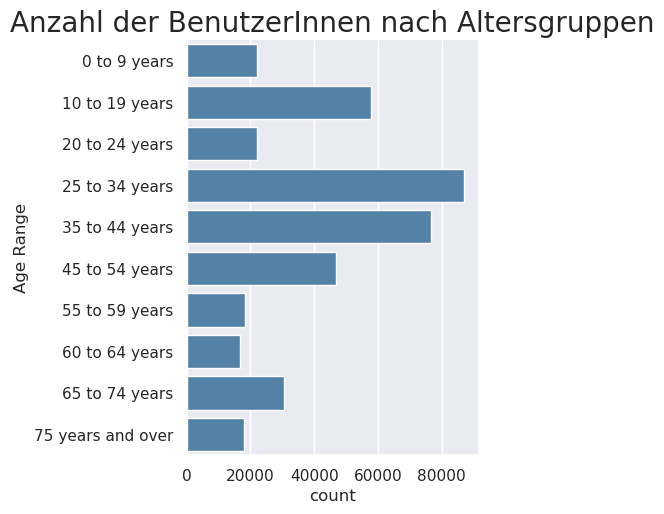

In [107]:
order = ['0 to 9 years','10 to 19 years','20 to 24 years','25 to 34 years','35 to 44 years','45 to 54 years','55 to 59 years','60 to 64 years','65 to 74 years','75 years and over']
sns.catplot(y='Age Range',data=df,kind='count',color='steelblue',order=order)
plt.title('Anzahl der BenutzerInnen nach Altersgruppen',fontsize=20)


## Wieviele Ausleihen tätigen die einzelnen Altersgruppen?

<Figure size 640x480 with 0 Axes>

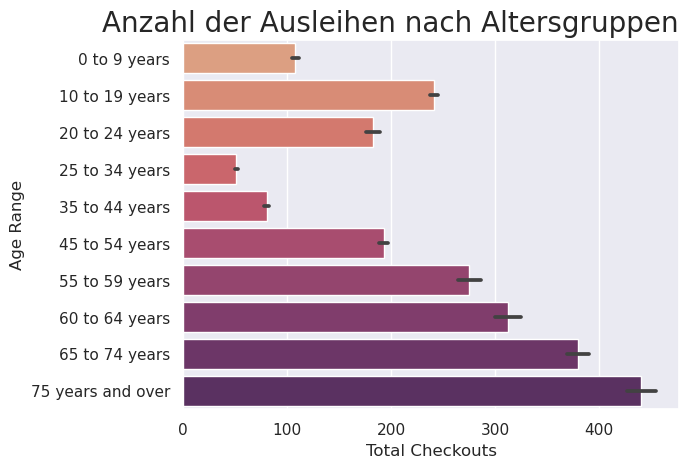

<Figure size 640x480 with 0 Axes>

In [108]:
order = ['0 to 9 years','10 to 19 years','20 to 24 years','25 to 34 years','35 to 44 years','45 to 54 years','55 to 59 years','60 to 64 years','65 to 74 years','75 years and over']
sns.barplot(data=df,y='Age Range',x='Total Checkouts',order=order,palette='flare')
#plt.xticks(rotation=90)
plt.title('Anzahl der Ausleihen nach Altersgruppen',fontsize=20,loc='right')
plt.figure()

## Wieviele Nutzer möchten per Email benachrichtig werden? 

In [140]:
row_filter_email = (df['Notice Preference Definition'] == 'Email')
row_filter_post = (df['Notice Preference Definition'] == 'Print')
email = len(df.loc[row_filter_email])*100/len(df)
post = len(df.loc[row_filter_post])*100/len(df)

print(round(email,2),"Prozent der BenutzerInnen bevorzugen Email,",round(post,2),"Prozent möchten per Post benachrichtigt werden")

90.01 Prozent der BenutzerInnen bevorzugen Email, 1.51 Prozent möchten per Post benachrichtigt werden


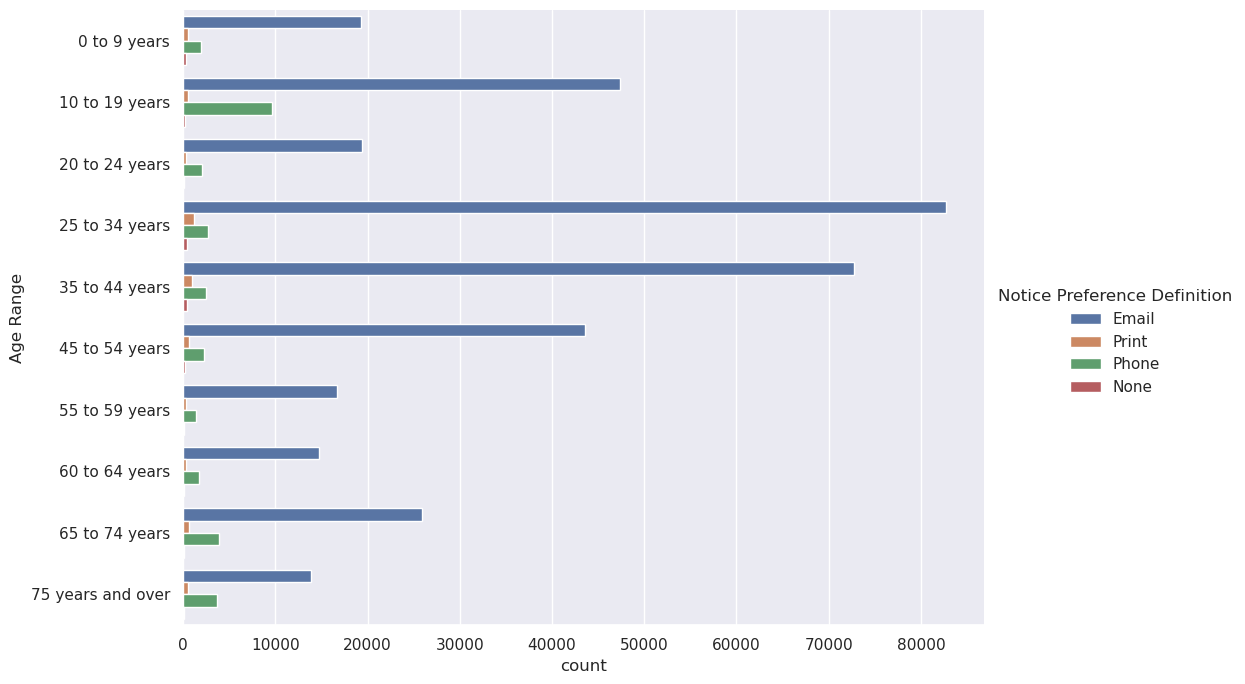

In [129]:
sns.catplot(y='Age Range',hue='Notice Preference Definition',data=df,kind='count',order=order,height=7,aspect=1.5)

## Wie alt sind diese Nutzer im Durchschnitt im Vergleich zu denen, die per Post informiert werden möchten?

## Wieviele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt?

## Leihen ältere Bibliothekskunden im Schnitt mehr Bücher aus als jüngere?

## Führen Kunden, die häufiger Ausleihen tätigen, im Schnitt auch häufiger Verlängerungen durch?

## Nimmt die Anzahl der Ausleihen mit zunehmender Dauer der Mitgliedschaft ab?